## The Variance of Random Walks

Suppose that for each $t$, $W(t)$ is a random variable. Suppose that the yearly change, $$\Delta W(t)=W(t+1)-W(t)$$ has distribution $N(0,1)$ for all t. the normal distribution with mean 0 and standard deviation (sdv) 1. Suppose also that $\Delta W(t)$ is independent of $\Delta W(s),\,s< t$ provided that the intervals $[s,s+1],[t,t+1]$ do not overlap except possibly at $t$. 

Then we have, by independence,
$${\rm var}(W(t+2)-W(t))={\rm var}(W(t+2)-W(t+1)+W(t+1)-W(t))={\rm var}(W(t+2)-W(t+1))+{\rm var}(W(t+1)-W(t))=1+1=2$$
so
$${\rm sdv}(\Delta W(t))=\sqrt{2}$$
A similar argument shows that under independence and normality assumptions, for any positive real $\Delta t$, if $\Delta W(t)=W(t+\Delta t)-W(t)$, we have
$${\rm sdv}(\Delta W(t))=\sqrt{\Delta t}$$

If we want a process with sdv $\sigma\sqrt{\Delta t}$ then we can consider 
$${\rm sdv}(\sigma \Delta W(t))=\sigma\sqrt{\Delta t}$$ 
We can restate this as: Given that if $\varepsilon$ is a random variable such that $\varepsilon\sim N(0,1)$, we have
$$\sigma \Delta W(t)\sim \sigma \varepsilon\sqrt{\Delta t}$$
We also have
$$W(t+\Delta t)=W(t)+\varepsilon \sqrt{\Delta t}$$

Consider a sequence of times $0=t_0<t_1<\dots<t_n=T$. Let $t_i-t_{i-1}=\Delta t$ independently of $i$. Let $S_i=S(t_i)$ and $W_i=W(t_i)$.

#### Plot Random Walk with Variance 1

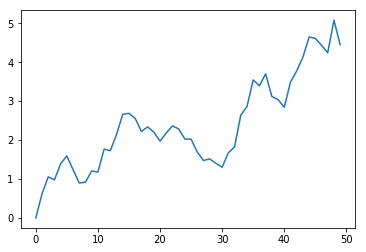

In [37]:
import numpy as np
from matplotlib import pyplot as plt
nsteps=50
t=np.linspace(0,10,nsteps)
dt=10/nsteps
W=np.zeros(nsteps)
W[0]=0
for i in range(1,nsteps):
    W[i]=W[i-1]+np.random.randn()*np.sqrt(dt)
plt.plot(W)
plt.show()

## Returns
- $$\ln(1+x)=x+\frac{x^2}2 +{\rm\ hot}\quad   ({\rm hot\ stands\ for\ higher\ order\ terms})\approx x \quad{\rm for\ }|x|<<1$$
- Simple Returns $$SRet_i=\frac{\Delta S_{i-1}}{S_{i-1}}=\displaystyle \frac{S_i-S_{i-1}}{S_{i-1}}=\frac{S_i}{S_{i-1}}-1$$.
- Log Returns $$LnRet_i=\ln(\frac{S_i}{S_{i-1}})$$.
$$LnRet_i=\ln \frac{S_i}{S_{i-1}}=\ln (1+(\dfrac{S_i}{S_{i-1}}-1))\simeq
\dfrac{S_i}{S_{i-1}}-1=SRet_i$$

so Simple Returns and Log Returns are not far different. (The
closeness of the ratio to 1 is essential for this to be true). Financial instruments only change by a small percentage on average over small time intervals, so the approximation is good for such time series. Using log returns is much easier mathematically.

## Model 1 of Stock Time Series $S_i$


Constant returns (for time intervals of the same length) depending linearly on time: 

\begin{align}\frac{\Delta S_i}{S_i}&=\mu\,\Delta t\\
S_{i+1}&=S_i+S_i\mu\Delta t=S_i(1+\mu\Delta t)
\end{align}

If we divide by $\Delta t$ and let $\Delta t\to 0$, we obtain
$$\frac{dS(t)}{dt}=\mu S(t)$$
which has solution
$$S(t)=S(0)e^{\mu t}$$

#### Compare the solution of the difference equation to the exponential

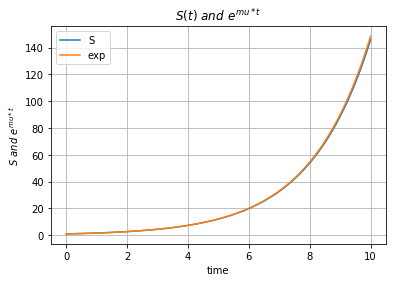

In [39]:
nsteps=1000
t=np.linspace(0,10,nsteps)
mu=.5;dt=10/nsteps        # 0.5 is not a realistic rate for stocks - .05 would be better

    # Program the solution of the difference equation
S=np.zeros(nsteps)
S[0]=1
for i in range(1,nsteps):
    S[i]=S[i-1]*(1+mu*dt)
    
    #Plot the solution S and plot exp(\mu t)
plt.plot(t,S,label='S');plt.plot(t,np.exp(mu*t),label='exp')
plt.grid(True)
plt.title('$S(t)\ and\ e^{mu*t}$')
plt.legend()
plt.xlabel('time')
plt.ylabel('$S\ and\ e^{mu*t}$')
plt.show()

## Model 2 of Stock Time Series $S_i$


Constant returns (for time intervals of the same length) depending linearly on time; added jump term with normal jumps, mean 0 sdv $\sigma$, linear in $\sqrt{\Delta t}$, $\epsilon$ standard normal random variable (mean=0, sdv=1):

\begin{align}\frac{\Delta S_i}{S_i}&=\mu\,\Delta t+\sigma\epsilon\sqrt{\Delta t}\\
S_{i+1}&=S_i+S_i\mu\Delta t+S_i\sigma\epsilon\sqrt{\Delta t}=S_i(1+\mu\Delta t+\sigma\epsilon\sqrt{\Delta t})
\end{align}

**Note**: Given $S_i$ we have $E(S_{i+1})=S_i(1+\mu\Delta t),\ {\rm var}(S_{i+1})=S_i^2\sigma^2\Delta t$.

Multiplying by $S_i$ and taking expectations conditional on knowing $S_i$ we obtain:
\begin{align}
E(\Delta S_i)=E(S_{i+1}-S_i)&=E(S_i)\mu\Delta t+E(S_i)\sigma E(\epsilon)\sqrt{\Delta t}\quad{\rm by\ independence\ of\ the\ two\ variables\ }S_i,\epsilon\\
&=E(S_i)\mu\Delta t + 0\quad {\rm since\ }E(\epsilon)=0\\
\Delta E(S_i)=E(\Delta S_i)&=E(S_i)\mu\Delta t\\
\frac{\Delta E(S_i)}{\Delta t}&=E(S_i)\mu
\end{align}
Hence we expect, on taking limits, that
$$\frac{dE(S)}{E(S)}=\mu dt,\quad E(S(t))=E(S(0))e^{\mu t}=S(0)e^{\mu t}$$
So $\mu$ is the *expected* rate of increase. The actual rate of increase depends on the added stochastic term.

The sdv of $S_{i+1}$ given the value of $S_i$ is $S_i*\sigma\sqrt{\Delta t}$ (the factor multiple of $\epsilon$).

### Plots of W,S and $S_0e^{\mu t}$

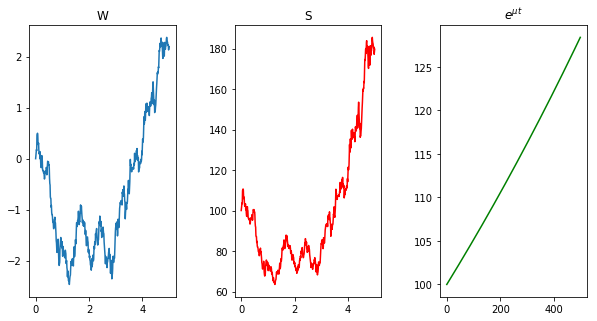

In [72]:
#np.random.seed(1000)
T=5
nsteps=100*T
t=np.linspace(0,T,nsteps)
dt=T/nsteps
W=np.zeros(nsteps)
W[0]=0
for i in range(1,nsteps):
    W[i]=W[i-1]+np.random.randn()*np.sqrt(dt)

mu=0.05;sigma=0.2
S=np.zeros(nsteps)
S[0]=100
for i in range(1,nsteps):
    S[i]=S[i-1]*(1+mu*dt+sigma*(W[i]-W[i-1]))
E=100*np.exp(mu*t)

_, (ax1, ax2,ax3) = plt.subplots(1, 3,figsize=(10,5))
plt.subplots_adjust(wspace=0.4)
ax1.plot(t,W)  
ax1.set_title('W')
ax2.plot(t,S,color='r') 
ax2.set_title('S')
ax3.plot(E[:500],'g')
ax3.set_title('$e^{\mu t}$')
plt.show()

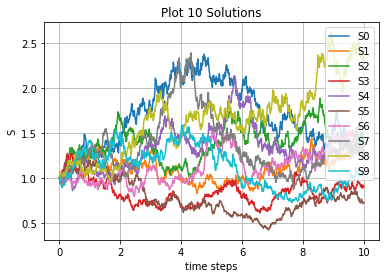

In [76]:
np.random.seed(300)
rand = np.random.standard_normal()
nsteps=1000
npaths=10
t=np.linspace(0,10,nsteps)
mu=0.05;dt=10/nsteps        
sigma=0.2                         # sdv of 0.2 is realsistic for a stack, mean of 0.05 is also realistic

    # Program several paths of the solution of the difference equation
S=np.zeros(nsteps)
S[0]=1
for j in range(npaths):
    for i in range(1,nsteps):
        rand = np.random.standard_normal()
        S[i]=S[i-1]*(1+mu*dt+sigma*rand*np.sqrt(dt))
    plt.plot(t,S,label='S'+str(j))
    # Plot the solutions
plt.grid(True)
plt.title('Plot '+str(npaths)+' Solutions')
plt.legend()
plt.xlabel('time steps')
plt.ylabel('S')
plt.show()

## Model 3 of Stock Time Series Log Returns

We model log returns $\ln\frac{S_{i+1}}{S_i}$. It is reasonable from the Model 2 equation that the stochastic term on the RHS have sdv $\sigma\epsilon$ (where $\sigma$ is the same as in the equation for $S_i$) but the mean $\mu'$ needs some modification.

\begin{align}\ln\frac{ S_{i+1}}{S_i}&=\mu'\,\Delta t+\sigma\epsilon\sqrt{\Delta t}
\end{align}

**Heuristic argument for the value of $\mu'$:**

The interest rate or log returns moves a stock up in a time interval $\Delta t$ from $S_i$ to $S_i(1+\mu\Delta t)$ but also up or down by an additional amount $-X$, say, because of the stochastic term, so that the time-dependency of $X$ is $\sqrt{\Delta t}$. Thus the total result becomes $S_i(1+\mu\Delta t - X)$.  Because of the symmetry of the normal distribution, it is almost certain that at some future time there is an added term $+X$, where $X$ is just about the same as before, in a similar change due to interest rates. Suppose that this latter term comes at the following move. Then over the two periods the total becomes $$S_i(1+\mu\Delta t-X)(1+\mu\Delta t + X)=S_i((1+\mu\Delta t)^2 -X^2)\approx S_i(1+\mu2\Delta t -X^2))$$
The expected value of $X^2$ is the variance, $\sigma^2\Delta t$, since $X$ has mean 0. So the two period total expectation is approximately $E(S_i)(1+2(\mu -\frac12\sigma^2)\Delta t)$.    Hence the one period total is just this with the factor 2 in front of the second bracket halved to 1. Thus  $\mu'=\mu-\frac12\sigma^2$.  So the equation becomes: 

\begin{align}\ln\frac{ S_{i+1}}{S_i}&=(\mu-\frac12\sigma^2)\,\Delta t+\sigma\epsilon\sqrt{\Delta t}\\
S_{i+1}&=S_i\exp((\mu-\frac12\sigma^2)\,\Delta t+\sigma\epsilon\sqrt{\Delta t})
\end{align}
where $\mu$ and $\sigma$ are the same as in the equation for $S_i$.

This version of the path of $S_i$ turns out to be more accurate.   
**Note**: This is a somewhat vague justification for using and the argument in this form cannot be made rigorous. We will see later in the course that the continuous version of this model justifies this discrete model. We just present the argument here to give some intuition why it may be correct.

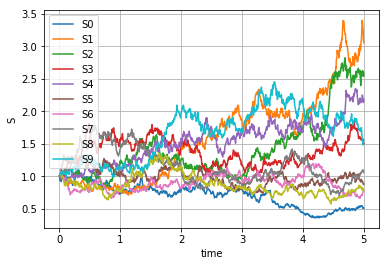

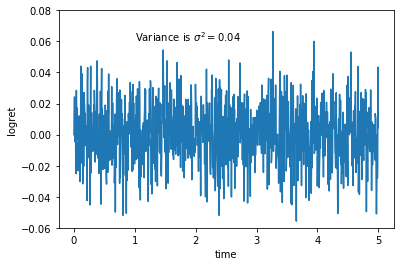

In [10]:
nsteps=1000;npaths=10
t=np.linspace(0,5,nsteps)
mu=0.05;dt=10/nsteps        
sigma=0.2                         # sdv of 0.2 is realsistic for a stack, mean of 0.05 is also realistic

    # Plot S using the last equation above
S=np.zeros(nsteps)
S[0]=1
logret=np.zeros(nsteps)
logret[0]=0
for j in range(npaths):
    for i in range(1,nsteps):
        rand = np.random.standard_normal()
        S[i]=S[i-1]*np.exp((mu-0.5*sigma**2)*dt+sigma*rand*np.sqrt(dt))
    plt.plot(t,S,label='S'+str(j)) 
for i in range(1,nsteps):
    logret[i]=np.log(S[i]/S[i-1]) 
plt.xlim=(0,3)
plt.grid(True)
plt.legend()
plt.xlabel('time')
plt.ylabel('S')
plt.show()
plt.figure()
plt.plot(t,logret)
plt.ylim(-.06,.08)
plt.xlabel('time')
plt.ylabel('logret')
plt.text(1,0.06,'Variance is $\sigma^2=0.04$')
plt.show()

## The Binomial Model of a Stock Price

The Binomial Model is based on supposing that at each time state the stock price can move up or down to only two possible values which are constant multiples of the initial price. The same constants are used throughout.

Let $u>d$ be the up and down (positive) factors, so if the stock has value $S_0$ at time 0, then it can go to only one of two values at time 1, $uS_0$ or $dS_0$. Let the probability of going up be $p$. Then the probability of going down is $1-p$. If the time intervals are all of width $\Delta t$ then the expected value at time $\Delta t$, given the value of $S_0$, will be $S_0e^{\mu\Delta t}$ and the variance will be $S_0^2\sigma^2\Delta t $. Hence
\begin{align}
E(S_1)=puS_0+(1-p)dS_0&=S_0e^{\mu\Delta t}\\
pu+(1-p)d&=e^{\mu\Delta t}\\
(u-d)p&=e^{\mu\Delta t}-d\\
p&=\frac{e^{\mu\Delta t}-d}{u-d}\\
1-p&=\frac{u-e^{\mu\Delta t}}{u-d}
\end{align}

If $p$ is to be a probability, it must be positive together with $1-p$. Hence we must have (recalling that $u>d$):
$$ d<e^{\mu\Delta t}<u$$

\begin{align}
var(S_1)=E(S_1^2)-(E(S_1))^2&=(pu^2S_0^2+(1-p)d^2S_0^2)-(puS_0+(1-p)dS_0)^2\\
&=p(1-p)(u-d)^2S_0^2\quad {\rm check\ by\ algebra}\\
&=\sigma^2\Delta tS_0^2\\
\sqrt{p(1-p)}\hspace{10pt} (u-d)&=\sigma\sqrt{\Delta t}\\
(u-e^{\mu\Delta t})(e^{\mu\Delta t}-d)&=\sigma^2\Delta t
\end{align}

$\mu$ is the instantaneous rate of increase of the stock and $\sigma\sqrt{\Delta t}$ is sdv of the returns. These can be obtained from the market prices of the stock modelled, although there are problems with measuring the former. In fact, for using this to price options on the stock it turns out that we do not need $\mu$. We need only two equations to find $u,d$ so we can use 
\begin{align}
pu+(1-p)d&=e^{\mu\Delta t}\\
(u-e^{\mu\Delta t})(e^{\mu\Delta t}-d)&=\sigma^2\Delta t\\
{\rm or}&\\
ud&=1
\end{align}
The first equation plus one of the following two determine the the two variables $u,d$. If the third equation is the one used then $u,d$ will depend on $\sigma$.

The latter equation implies that an up followed by a down move  (or vice versa) results in the value of the stock being unchanged.

Hence given $\mu$ and $\sigma$ we can fix the values of the parameters in the model. This is called *calibrating* the equation to the instrument being considered. The value of $\sigma$ is fairly easy to determine from market data. The value of $\mu$ is not easy to determine and proves to be unnecessary in option pricing as we will see.

### Evaluating Vanilla Option Prices Using a Binomial Tree

A Derivative $f(S)$ is a function of an underlying stock price $S$. For a Call with strike price $K$, we have
$$f(S)=(S-K)^+$$
For a Put with this strike we have 
$$f(S)=(K-S)^+$$
What is the value of a Call and a Put, which is to be exercised at some later time, at time 0?

We suppose that our stock $S$ follows a binomial model with given $u,d,\mu=r,\sigma$ where $r$ is the rf rate. (We will see later that setting $\mu=r$ yields a no-arbitrage price in our procedure). Let the value of the derivative be $f_0$ at $t=0$, $f_u,f_d$ the up and down values of the derivative at time $\Delta t$. We construct a portfolio $V$ consisting of a number of shares $S_0$ of $S$ at time 0 and a zero coupon bond maturing at time $\Delta t$ whose expiry value we denote by $B$. Let
$$V_0=\delta_0 S_0+e^{-r\Delta t}B$$
at time 0. We require the up value of the portfolio to be $f_u$ in case of an up movement of stock and the downvalue to be $f_d$ otherwise. We show that it is possible to choose $\delta_0$ and $B$ so that this condition is satisfied. We need 
\begin{align}
\delta_0 S_0u+B&=f_u\\
\delta_0 S_0d+B&=f_d
\end{align}
subtracting and solving for $\delta_0$ we obtain
\begin{align}
\delta_0&=\frac{f_u-f_d}{S_0(u-d)}\\
B&=f_u-\frac{u(f_u-f_d)}{u-d}=\frac{uf_d-df_u}{u-d}\\
V_0&=\frac{f_u-f_d}{S_0(u-d)}S_0+e^{-r\Delta t}\frac{uf_d-df_u}{u-d}
\end{align}
The first term on the RHS of the last equation is a certain number of stocks at price $S_0$ and the second is a cash amount being the value of the bond at time 0. 
Now $V_0$ and $f_0$ have exactly the same payoffs at time $\Delta t$ in both the only two possible states of the world and by a standard no-arbitrage argument they must have the same price at time 0. (If not we could buy the lower priced item (derivative or portfolio) and sell the other at time 0 making a positive profit, and settling any debts that this may incur at time $\Delta t$ using the identical two values. This would result in a certain profit).

We rewrite the last equation as follows:
\begin{align}
V_0&=e^{-r\Delta t}(\frac{e^{r\Delta t}-d}{u-d}f_u+\frac{u-e^{r\Delta t}}{u-d}f_d)\\
&=e^{-r\Delta t}(pf_u+(1-p)f_d)\\
p&=\frac{e^{r\Delta t}-d}{u-d}\\
1-p&=\frac{u-e^{r\Delta t}}{u-d}
\end{align}
This shows that we could find the value of $V_0$ and hence of $f_0$ if we know $f_u$ and $f_d$. However, if $\Delta t$ is the exercise time of the option $f(S)$ then $f_u=f(S_u),f_d=f(S_d)$. This leads to the following algorithm:

1. Calculate the stock tree up to exercise time of the option. 
2. Evaluate $f(S)$ at each final value of $S$. 
3. Work backwards from the final values of $f$ using the expression on the RHS of  the equation for $V_0$ on pairs of final values until the first node of the tree is reached.
4. The value obtained at the first node is a no-arbitrage value for the derivative price.

**Note**
1. The value of $p$ is nearly the same as the value of $p$ obtained earlier for the stock tree. The only difference is that the value $r$ of the risk free rate is substituted for $\mu$, the growth rate of the stock. Thus the no-arbitrage probabilities for stock derivatives can be evauated by regarding all stocks as having the same rate of growth as the risk-free rate. In a world in which people are oblivious to risk, all stocks would have the same rate of growth since people would choose the highest growth rated stocks regardless of risk in doing this and if there were a lower rate for the stock this would lead to arbitrage.. Thus the only stable growth rate of any stock is the risk-free rate. Such a world (which does not exist) is called the *risk-neutral* world and it must be used in no-arbitrage pricing of derivatives. Thus the price of an option will not be dependent on its expected rate of growth $\mu$.
2. $p,1-p$ is a probability measure if $u\,>\,e^{r\Delta t}\,>d$, since $p>0,\,1-p>0,\,p+(1-p)=1$. It is called a $risk$-$neutral$ probability measure.


## Hedging

Suppose we have done the forward and backward induction algorithms and that we know the values of the stock and the option at each node of the tree. We will denote the value of $f$ at time $i$ by $f_i$ (this is a little confusing as we have also used $f_u$ for a different purpose).  
Suppose we set up a portfolio at any time before exercise, which time we dentote by time 0, as above, consisting of a number of shares each valued at $S_0$ and an additional cash amount:
$$V_0=\frac{f_u-f_d}{S_0(u-d)}S_0+e^{-r\Delta t}\frac{uf_d-df_u}{u-d}(=f_0)$$
At time $t=1$ the value of a share will be either $uS_0$ or $dS_0$.  
Suppose it is $uS_0$. Then:
$$V_1=\frac{f_u-f_d}{S_0(u-d)}uS_0+\frac{uf_d-df_u}{u-d}=\frac{f_u-f_d}{(u-d)}u+\frac{uf_d-df_u}{u-d}=f_u$$
Suppose it is $dS_0$. Then:
$$V_1=\frac{f_u-f_d}{S_0(u-d)}dS_0+\frac{uf_d-df_u}{u-d}=\frac{f_u-f_d}{(u-d)}u+\frac{uf_d-df_u}{u-d}=f_d$$
In both cases $V_!$ has exactly the value of the option. We say that $V_1$ is a *perfect hedge* for the option at time 0.  

The cost of the hedging portfolio is $V_0=f_0$. The portfolio will be worth $V_1=f_1$ at time 1 in all cases and this is the cost of setting up a similar portfolio at time 1 as a hedge for the future value of the option at time 2, namely $f_2$.   

The hedging portfolio does not incur any additional cost to be a hedge at any time in the future before exercise, nor is it worth more than what is necessary to hedge in the future. Such a portfolio is said to be *self-financing*.

**Note:** 
1. The above shows that if the tree values are accurate, we can can choose any path starting at time 0 and ending at exercise time and we can set up a self-financing portfolio which hedges the option perfectly along the path.
2. Of course, this is only a model. The chances that the stock will attain exactly the tree values and that the option will attain exactly the tree values is vanishingly small in general. However, if we do the valuation over a sufficiently large number of time steps, it can be shown that the values obtained for the options will be close to the values obtained when using continuous time models. These continuous models also are not accurate in any sense but give a good idea of what the values should be.  
3. It should also be mentioned that if someone decides to sell an option and then sets up a perfect hedge for all time for it, she will not make a profit without setting up an arbitrage opportunity somewhere along the line. The strategy for an option salesperson is to set up a hedge that softens only some of the bad possibilities. Without such hedging, some options can result in "infinite" losses for the seller or buyer.

## The Greeks and Hedging

A Call Option is said to be *in-the-money* at time $t$ if $S_t>K$, *out-of-the-money* if $S_t<K$ and *at-the-money* if $S_t=K$. The reverse holds for a Put Option.  
For a European call $C(S)$ the value of the call will increase if $S$ increases since there is a greater chance that the call will be exercised in the money. Thus $\frac{\partial C}{\partial S}\ge 0$. It is also $\le 1$ since the change in the value of a call with $S$ can never be greater than the change in $S$ or else we would not pay for a call but buy stock instead. The opposite is true for European puts.  
In the hedging portfoilio for a European call the discrete rate of change of the call value with respect to $S$ is given by what is called the (discrete) *Delta* ($\Delta$) of the call, namely
$$\Delta=\frac{C_u-C_d}{S_u-S_d}=\frac{C_u-C_d}{S_0(u-d)}$$
Note that this is the number of shares purchased in the hedging portfolio. Note that this is a discrete version of $\frac{\partial C}{\partial S}$, the rate at which $C$ changes with respect to $S$.

Another expression for this is derived as follows, using $C_0=e^{-r\Delta t}(pC_u+(1-p)C_d),\ p=\frac{e^{r\Delta t}-d}{u-d}$:
$$C_0-e^{-r\Delta t}C_d=e^{-r\Delta t}p(C_u-C_d)=\frac{1-e^{-r\Delta t}d}{u-d}\frac{S_0}{S_0}(C_u-C_d)=\frac{S_0-e^{-r\Delta t}S_d}{S_u-S_d}(C_u-C_d)$$
$$\Delta=\frac{C_u-C_d}{S_u-S_d}=\frac{C_0-e^{-r\Delta t}C_d}{S_0-e^{-r\Delta t}S_d}=\frac{C_0-e^{-r\Delta t}C_u}{S_0-e^{-r\Delta t}S_u}$$
where the last equality is derived similarly to the second equality.

The availability of options is heavily dependent on there being agents who sell the option (called *writing* the option - this is effectively selling the option short). We discuss calls. The no-arbitrage value of the call is obtained from a Binomial Model with a small time step, fairly accurately. The writer would hope to sell the call at the fair value plus a premium $PR$ for doing this and to take care of any other costs involved, in other words he would sell for the cash value of $C_0+PR=\Delta_0 *S_0+CASH_0+PR$. The seller may then invest this at the rf rate. To insure the profit is $PR$ at expiry time $T$ the writer would need to have $C_T=\Delta_T*S_T+CASH_T=(S_T-K)^+$ so that he could pay out this possible difference to the purchaser thus ensuring that the purchaser can buy the stock at an effective price $K$ at time $T$. However, the stock price after time $\Delta t$ may not be either $uS_0$ or $dS_0$ so at that time we need to recalculate the option price and the  portion of the investment that goes to maintaining the correct option price, which may eat into $PR$. One way to mitigate this is to try to neutralise the change to the portion $\Delta_t*S_t$ (when t=$\Delta t$). Thus we could buy stock with value $\Delta_t*S_t$ and at regular intervals (say 1 week) buy or sell stock so that this value is held for all the chosen rebalancing times. The writer holds effectively a portfolio of short one call plus the invested price paid for the call by the purchaser, and he now adds to it $\Delta_t*S_t$ shares, periodically rebalanced. The Delta of $CASH_t$ will be small, hopefully,  and the Delta of this new portfolio is approximately $-\Delta t+\Delta t$ which is 0.

In general, a portfolio is said to be *delta-neutral* if its Delta is 0. If a portfolio $V$ consists of a number of other options in the same underlying plus cash, the delta of $V$ is the sum of the deltas of the various assets in the portfolio. It is possible to make it approximately zero by adding or shorting $\Delta_V$ underlyings. If there are different assets and options on them in $V$ then the $\Delta$ of each asset can be neutralised separately in this way. A delta-neutral portfolio is fairly immune to the change in asset prices due to changes in $S$. This is useful in hedging written (or short) options.

**Note**:  
1. As we will see, by taking $\Delta t$ to be vary small and doing the calculations we get very close to the values that would be obtained by the continuous (Black-Scoles) model for option prices. We can use these to calculat the value of $\Delta$ for the option at any time by calculating the approximate derivative
$$\frac{C(t+\Delta t)-C(t)}{S(t+\Delta t)-S(t)}$$
2. We will see below that it is easy and quick to obtain call values correct to 2 decimal places of the continuous model by using a time step of the order 0.01.


The second derivative of the portfolio with respect to $S$ reflects the rate of change of $\Delta$ - it is called $Gamma$. We do not want this to be too large, in fact we would rather it be approximately 0 so that we will not have to rebalance $\Delta$ often. A change of $\Delta S_0$ will result in a change of $\frac12 \Gamma (\Delta S_0)^2$ approximately in the portfolio value. By adding additional options in the underlying it may be possible to reduce $\Gamma$ to 0. 

There are other unfavourable effects we may want to neutralise in this way. For example, changes in volatility, risk-free rate over time (${\rm Vega}, \rho,\Theta$), among other less important one. (Hence the name Greek Letters, although Vega is not a real Greek letter). We will not do this here.

Put-Call Parity says that
$$C_0-P_0=S_0-Ke^{-rT},\ P_0=C_0-S_0+Fe^{-rT}$$
$$\Delta P_0=\Delta C_0-\Delta S_0$$
On dividing by $\Delta S_0$ we see that
$$\Delta_{put}=\Delta_{call}-1$$
The delta of a single European call lies between 0 and 1 so the delta of a European put lies between -1 and 0.

**Reference** See the discussion in Hull's book, chapter entitled "The Greek Letters".

## Evaluating American Vanilla Options
American vanilla options have the same payoff functions as the European options that we have been discussing. For European options one must wait until a fixed time period has elapsed before exercising them. For American options the long position may decide to exercise at any time up to expiry. The value of the payoff then is the value of the payoff function at the asset price at that exercise time on the market.

To evaluate whether or not to exercise at some time, one looks at the value that would be payed and also at the expected value (under the risk-neutral measure), at the node time, of the option value if we went one step further. If the payoff is greater than the expected value then exercise.

The expected value of continuing to the next step can be estimated by using the binomial tree value at that node in the backward induction process. if this is less than the payoff at that node, then exercise. We will program both American and European vanilla option price calculations below and one can see how this is done by reading the program.

In the Black Scholes continuous model there is an algebraic formula for call and put prices. No such formula is known for American call and put prices. There are, however, some approximate algebraic formulae for American options. Nevertheless, it is just as quick nowadays to use Monte Carlo methods for the evaluation.

### Exercises
1. A stock price is currently R40. It is known that at the end of one month it will be either
R42 or R38. The risk-free interest rate is 8% per annum with continuous compounding.
What is the value of a one-month European call option with a strike price of R39?  

2. Explain the no-arbitrage and risk-neutral valuation approaches to valuing a European
option using a one-step binomial tree.

3. What is meant by the delta of a stock option?

4. A stock price is currently R50. It is known that at the end of six months it will be either R45
or R55. The risk-free interest rate is 10% per annum with continuous compounding. What
is the value of a six-month European put option with a strike price of R50?

5. A stock price is currently R100. Over each of the next two six-month periods it is
expected to go up by 10% or down by 10%. The risk-free interest rate is 8% per annum
with continuous compounding. What is the value of a one-year European call option
with a strike price of R100?

6. For the situation considered in Problem 5, what is the value of a one-year European
put option with a strike price of R100? Verify that the European call and European Put
prices satisfy put-call parity.

7. What are the formulas for u and d in terms of volatility?

8. Consider the situation in which stock price movements during the life of a European
option are governed by a two-step binomial tree. Explain why it is not possible to set
up a position in the stock and the option that remains riskless for the whole of the life
of the option.

9. A stock price is currently R50. It is known that at the end of two months it will be either
R53 or R48. The risk-free interest rate is 10% per annum with continuous compounding.
What is the value of a two-month European call option with a strike price of R49?

10. A stock price is currently R80. It is known that at the end of four months it will be either
R75 or R85. The risk-free interest rate is 5% per annum with continuous compounding.
What is the value of a four-month European put option with a strike price of R80? 

11. A stock price is currently R40. It is known that at the end of three months it will be either
R45 or R35. The risk-free rate of interest with quarterly compounding is 8% per annum.
Calculate the value of a three-month European put option on the stock with an exercise
price of R40. 

12. A stock price is currently R50. Over each of the next two three-month periods it is
expected to go up by 6% or down by 5%. The risk-free interest rate is 5% per annum
with continuous compounding. What is the value of a six-month European call option
with a strike price of R51?

13. For the situation considered in Problem 12, what is the value of a six-month
European put option with a strike price of R51? Verify that the European call and
European put prices satisfy put-call parity. If the put option were American, would it
ever be optimal to exercise it early at any of the nodes on the tree?

14. A stock price is currently R25. It is known that at the end of two months it will be either
R23 or R27. The risk-free interest rate is 10% per annum with continuous compounding.
Suppose $S_T$ is the stock price at the end of two months. What is the value of a derivative
that pays off ,q at this time?

15. Calculate u, d, and p when a binomial tree is constructed to value an option on a foreign
currency. The tree step size is one month, the domestic interest rate is 5% per annum, the
foreign interest rate is 8% per annum, and the volatility is 12% per annum.

16. A stock price is currently R50. It is known that at the end of six months it will be either
R60 or R42. The risk-free rate of interest with continuous compounding is 12% per
annum. Calculate the value of a six-month European call option on the stock with an
exercise price of R48. 

17. A stock price is currently R40. Over each of the next two three-month periods it is
expected to be up by 10% or down by 10%. The risk-free interest rate is 12% per annum
with continuous compounding.
a. What is the value of a six-month European put option with a strike price of R42?
b. What is the value of a six-month American put option with a strike price of R42?

18. Using a "trial-and-error" approach, estimate how high the strike price has to be in
Problem 17 for it to be optimal to exercise the put option immediately.

19. A stock price is currently R30. During each two-month period for the next four months it
will increase by 8% or decrease by 10%. The risk-free interest rate is 5%. Use a two-step
tree to calculate the value of a derivative that pays off $[max(30 - S_T , 0)]^2 $, where $S_T$ is the
stock price in four months. If the derivative is American style, should it be exercised
early?

20. Consider a European call option on a non-dividend-paying stock where the stock price is
R40, the strike price is R40, the risk-free rate is 4% per annum, the volatility is 30% per
annum, and the time to maturity is six months.
a. Calculate u, d, and p for a two-step tree:
b. Value the option using a two-step tree.
c. Verify that the program in this notebook gives the same answer.
d. Use the program in this notebook to value the option with 5, 50, 100, and 500 time steps.

21. Repeat Problem 20 for an American put option on a futures contract. The strike price
and the futures price are R50, the risk-free rate is 10%, the time to maturity is six
months, and the volatility is 40% per annum.

Do:   
4,12,13,17,19,20